# Лабораторная работа №2.
Выполнил: студент группы 9383, Рыбников Роман.

Цель $-$ изучить и применить дискретное преобразование Фурье с помощью библиотек анализа речевых сигналов Python.

## Задачи:

1. Используя ДПФ построить траекторию основного фона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.
3. Постороить сонограмму по записи своего голоса.

#### Импортируем нужные библиотеки:

In [1]:
import audiofile as audiofile
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.io import wavfile
from scipy import signal
from scipy.signal import spectrogram 
import IPython
import IPython.display as ipd
import more_itertools as mi

In [2]:
rate, signal = wavfile.read('signal.wav', "r")
lenOfSignal = signal.shape[0] / rate
time = np.linspace(0, lenOfSignal, signal.shape[0])

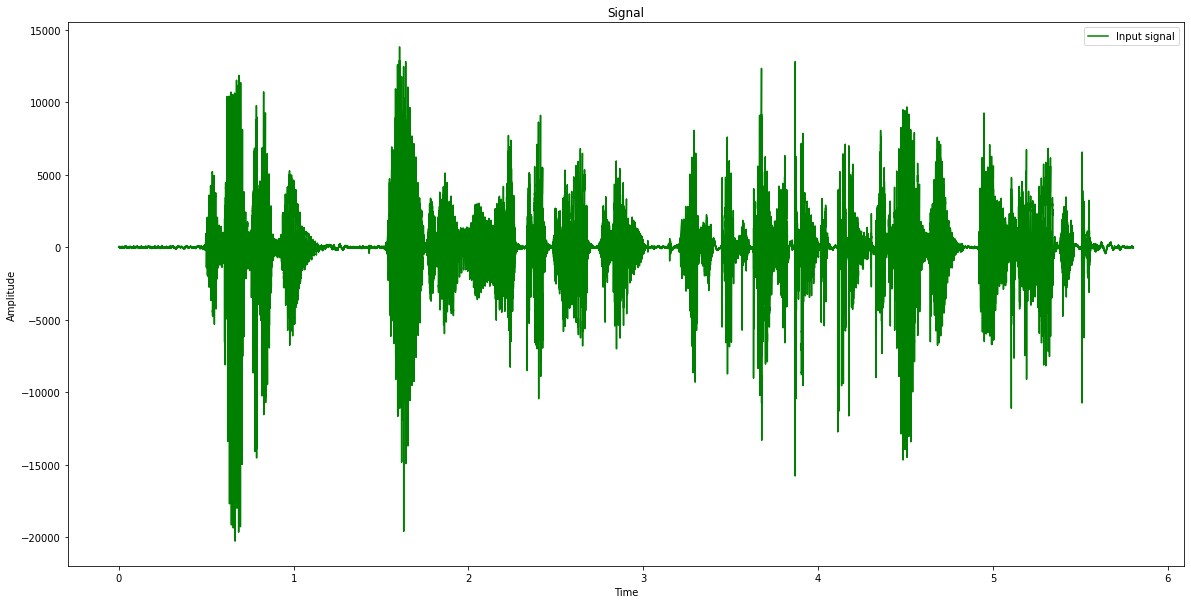

In [4]:
fig = plt.figure("Signal")
fig.set_figwidth(20)
fig.set_figheight(10)
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(time, signal, color="green", label = 'Input signal')
plt.legend()
plt.show()
ipd.Audio("signal.wav")

### Пункт первый:

In [5]:
N = 256
intervals = list(mi.windowed(signal,n = N, step = int(N/4)))
intervals[-1] = [i for i in intervals[-1] if i]
for i in range(len(intervals)):
    intervals[i] = intervals[i] * np.hamming(len(intervals[i]))
    
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape(N, 1)
    exp = np.exp(-2j * np.pi * k * n / N)
    return np.dot(exp, x)

dft_intervals = []
for i in intervals:
    dft_intervals.append(DFT(i))

amp_s = [(sum([j**2 for j in i[:int(len(i)/2)]])**0.5).real for i in dft_intervals]


No handles with labels found to put in legend.


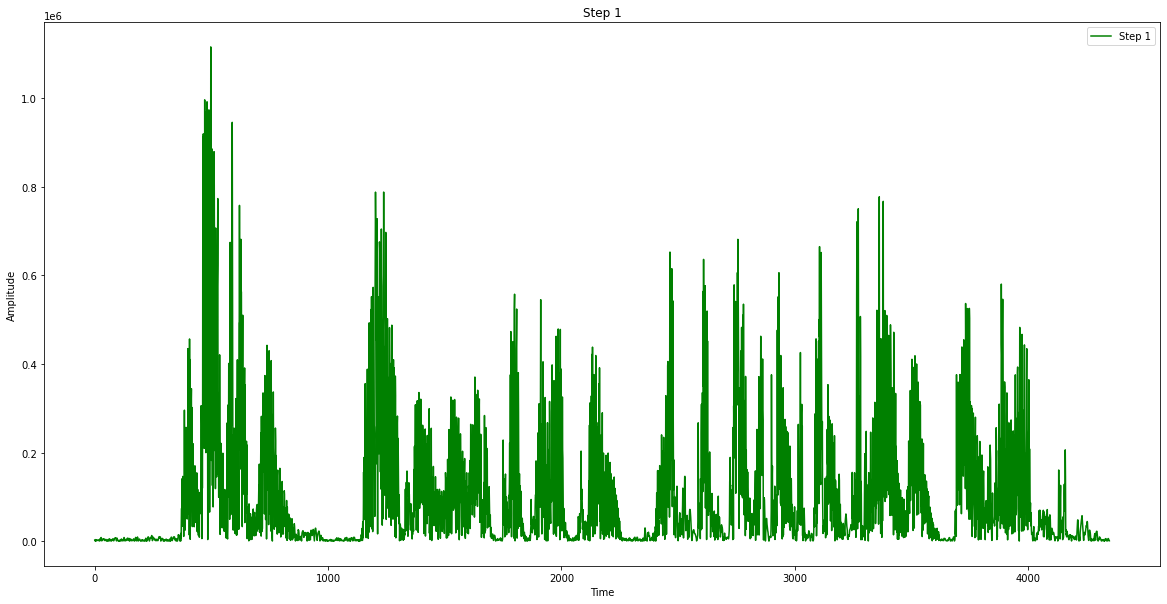

In [6]:
fig = plt.figure("Step 1")
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Step 1")
plt.legend()
plt.plot(amp_s, color="green", label = 'Step 1')
plt.legend()

In [7]:
f = []
for i in range(0, len(amp_s), int(rate/N)):
    f.append(np.array(amp_s[i:i + int(rate/N)]))

F0 = []
for i in f:
    if i.max() > 2*i.mean():
        F0 += (i.tolist())
    else:
        F0 += np.zeros(len(i)).tolist()


No handles with labels found to put in legend.


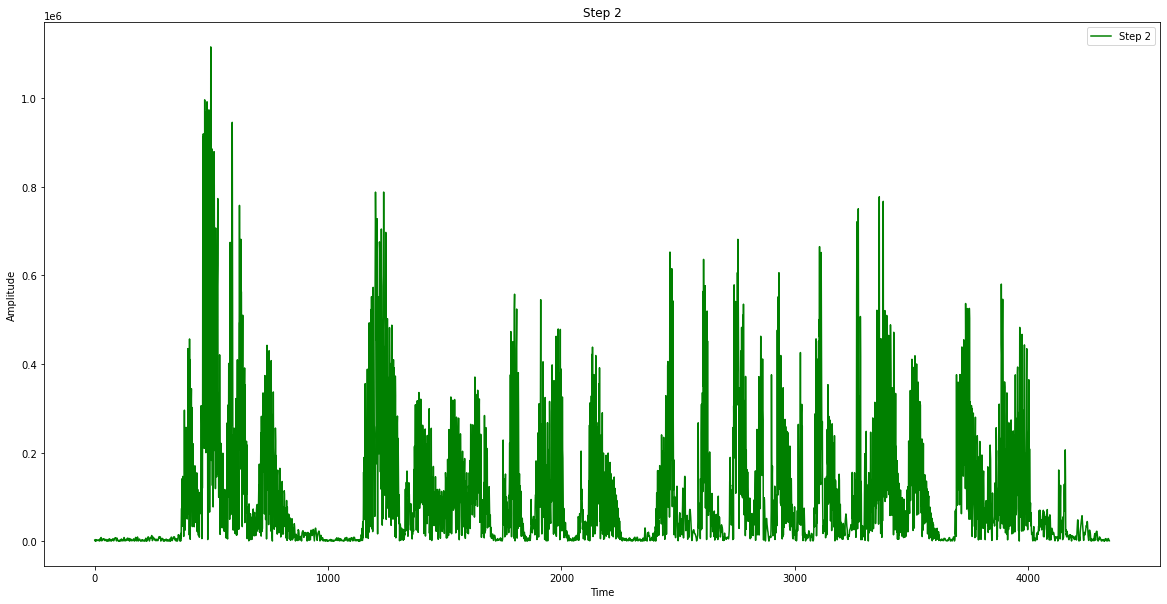

In [8]:
fig = plt.figure("Step 2")
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Step 2")
plt.legend()
plt.plot(F0, color="green", label = 'Step 2')
plt.legend()

### Пункт второй:

In [9]:
def Formant(n, F0):
    result = []
    if(F0[0] > n * max(F0[0], F0[1])):
        result += [max(F0[0], F0[1])]
    else:
        result += [0]
    for i in range(1, int(len(F0) / n)):
        m = max([F0[n * i], F0[n * i + 1], F0[n * i - 1]])
        if(F0[i] > n * m):
            result += [m]
        else:
            result += [0]
    return result


F1 = Formant(2, F0)
F2 = Formant(3, F0)
F3 = Formant(4, F0)

Text(0.5, 1.0, 'Вторая форманта')

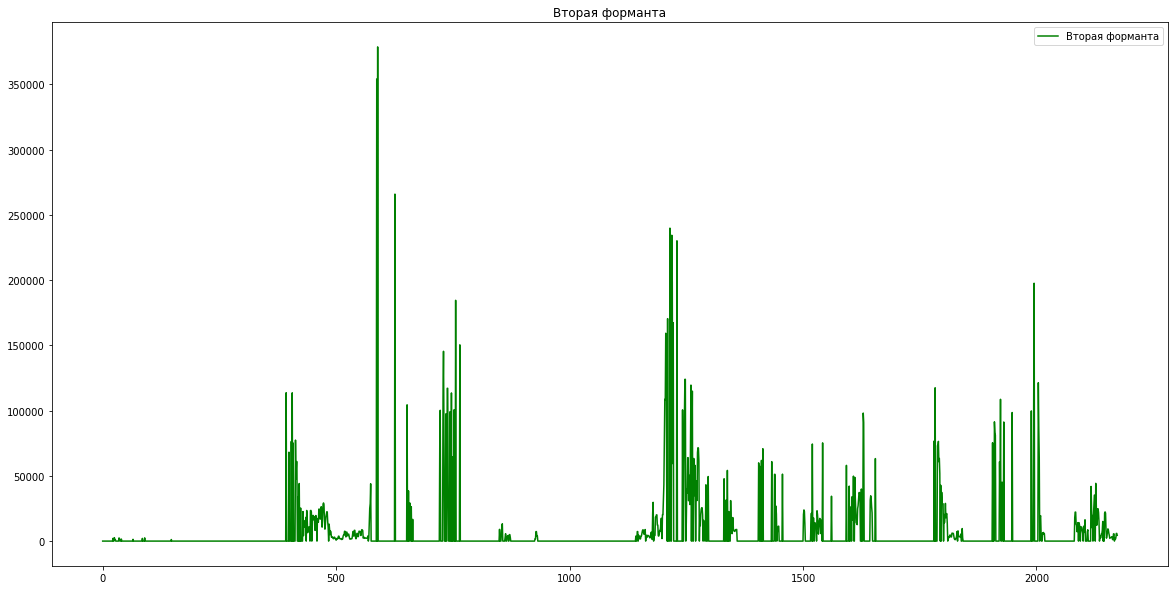

In [10]:
fig = plt.figure("Вторая форманта")
fig.set_figwidth(20)
fig.set_figheight(10)
plt.plot(F1, color="green", label = 'Вторая форманта')
plt.legend()
plt.title("Вторая форманта")

Text(0.5, 1.0, 'Третья форманта')

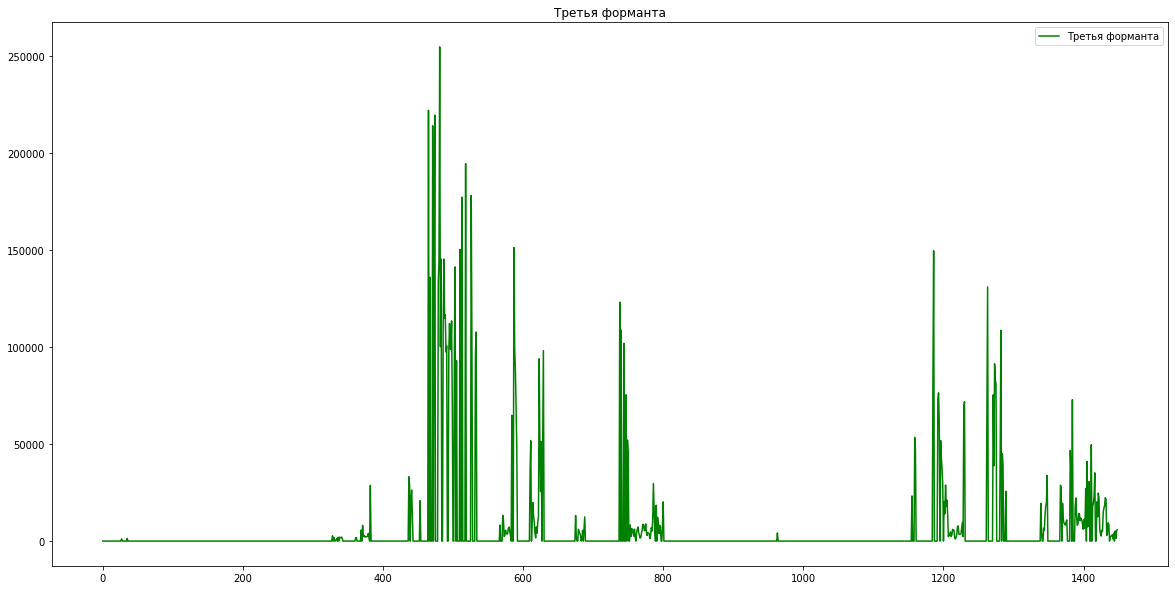

In [11]:
fig = plt.figure("Третья форманта")
fig.set_figwidth(20)
fig.set_figheight(10)
plt.plot(F2, color="green", label = 'Третья форманта')
plt.legend()
plt.title("Третья форманта")

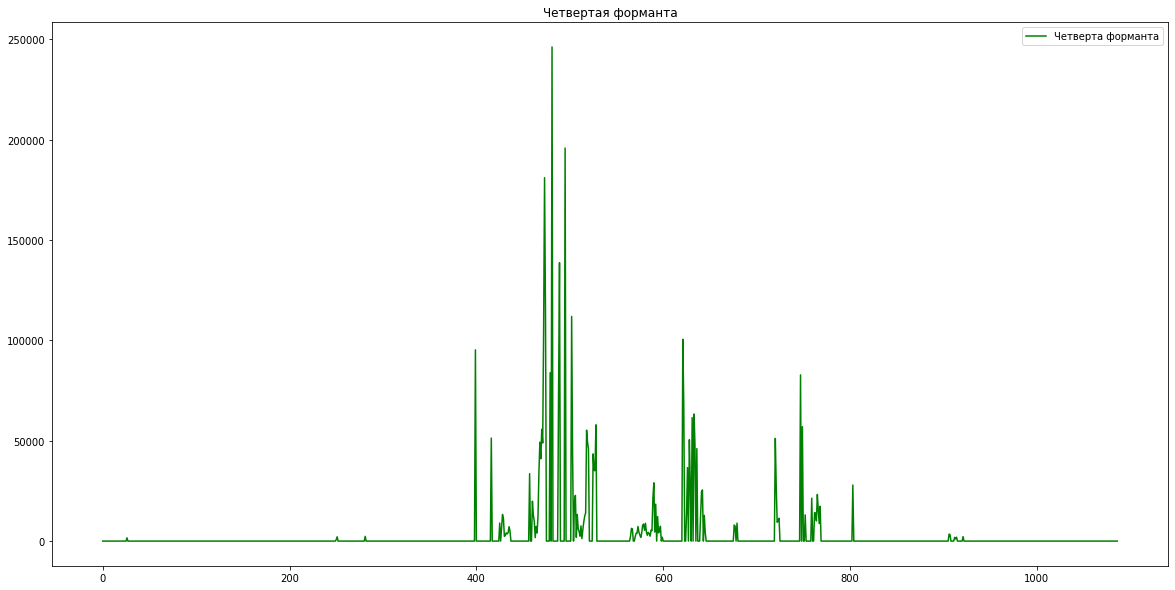

In [12]:
fig = plt.figure("Четверта форманта")
fig.set_figwidth(20)
fig.set_figheight(10)
plt.plot(F3, color="green", label = 'Четверта форманта')
plt.title("Четвертая форманта")
plt.legend()

### Пункт третий:

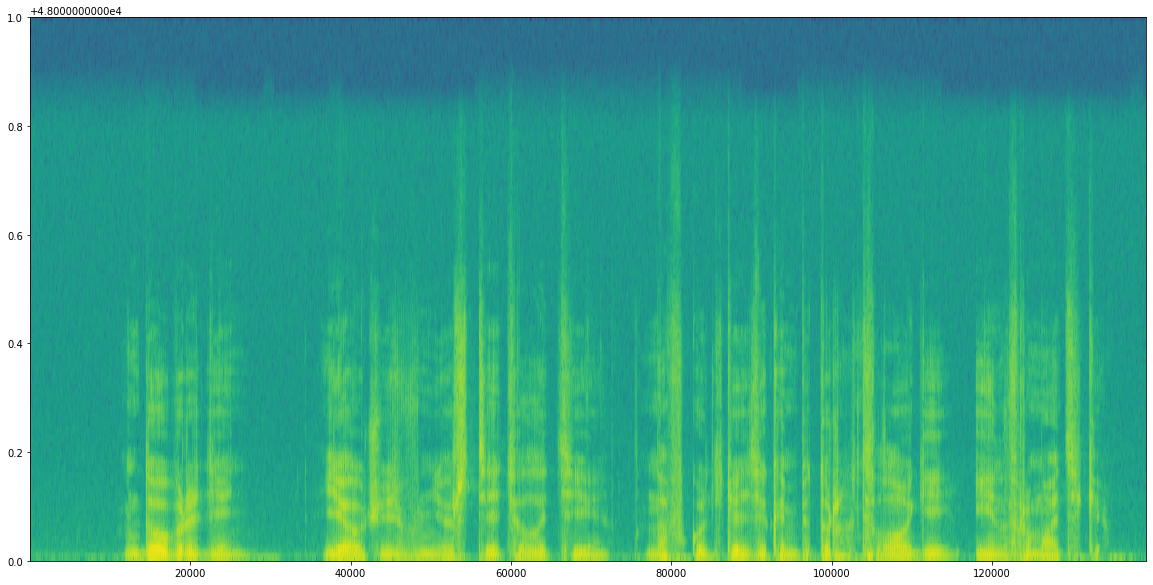

In [13]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.specgram(signal, NFFT=N, pad_to=N, Fc=rate)
plt.show()

### Вывод:
В ходе выполнения лабораторной работы была построена траектория основного тона ДПФ, так же были построены траектории для второй, третьей, четвертой формантных частот. Была построена сонограмма.